> Aurélie Jolas, ESILV, 5A

# Devoir 

### Informations sur le dataset 

La base de données contient des enregistrements pour 1885 répondants. Pour chaque répondant, 12 attributs sont connus: 
* les mesures de personnalité comprenant : 
    * NEO-FFI-R (neuroticisme, extraversion, ouverture à l'expérience, agrément et conscience), 
    * BIS-11 (impulsivité) 
    * ImpSS (recherche de sensations), 
* niveau d'éducation, 
* âge, 
* sexe, 
* pays de résidence
* appartenance ethnique. 

Tous les attributs d'entrée sont à l'origine catégoriques et sont quantifiés. Après la quantification, les valeurs de toutes les entités en entrée peuvent être considérées comme des valeurs réelles. 

En outre, les participants ont été interrogés sur l’utilisation de 18 drogues licites et illégales : 
* alcool, 
* amphétamines, 
* nitrite d’amyle, 
* benzodiazépine, 
* cannabis, 
* chocolat, 
* cocaïne, 
* caféine, 
* ecstasy, 
* héroïne, 
* kétamine, 
* hauts légaux, 
* LSD, 
* méthadone, 
* champignons
* etc. 

La base de données contient 18 problèmes de classification. Chacune des variables d'étiquette indépendantes contient sept classes: 
* "Jamais utilisé", 
* "Utilisé il y a une décennie", 
* "Utilisé au cours de la dernière décennie", 
* "Utilisé l'année dernière", 
* "Utilisé le mois dernier", 
* "Utilisé la semaine dernière", 
* "utilisé aujourd'hui".

### Problème à régler
Évaluer le risque de devenir un consommateur de drogue, pour chaque drogue sachant la consommation des 17 autres drogues. 


### Travail 

L’objet du devoir est de mettre en pratique les différentes compétences nécessaires au
métier de data-scientist. 
Je vais tout d'abord récupérer les données accessibles via l'url : https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data. 
Une fois ces données récupérées, mon travail consistera à préparer et nettoyer les valeurs et les colonnes du dataset. Après cela, je visualiserai les données grâce à des graphiques. 
Enfin, le travail de modélisation débutera. Pour cela je travaillerai sur les hyperparamètres pour obtenir des resulats pertinents en travaillant sur une seule drogue. Enfin, j'utiliserai les hyperparamètres trouvés pour automatiser la modélisation sur toutes les drogues avec 3 modèles différents (Support Vector Machine (SVM),  K-Nearest Neighbors (KNN) et Random Forrest). Je rassemblerai les résultats dans un tableau comparatif.  


### Librairies utilisées pour le projet

In [1]:
import os
import csv
import requests
from bs4 import BeautifulSoup
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

# Importation des données


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

Je récupère la page avec requests.get (qui va faire une requête HTTP/HTTPS).  <br>
Une fois cette requête réalisée, je peux récupérer le contenu de la page avec .content . <br>
Enfin grâce à BeautifulSoup je peux le parser.

In [3]:
requete = requests.get(url)
page = requete.content
soup = BeautifulSoup(page, "lxml")

Je souhaite maintenant récupérer le texte de la balise <p\>

In [4]:
texte = soup.find("p")
print(texte.string.strip())

1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983

# Importation en CSV 

Je crée un nouveau fichier CSV (ici donnees.csv) <br>
Je récupère dans un tableau (lines) toutes les lignes du texte.<br>
Pour chaque lignes, je crée un tableau (line) contenant chaque valeur de la ligne. <br>
J'écris chaque ligne dans le fichier CSV

In [5]:
with open("donnees.csv", "w", encoding="utf-8") as fichier:
    writer = csv.writer(fichier)
    lines = texte.string.strip().split("\r\n")
    for i in range (0, len(lines)): 
        line = lines[i].split(',')
        writer.writerow(line)

L'entête de mon fichier CSV

In [6]:
head = ['ID', 
        'Age', 
        'Gender', 
        'Education', 
        'Country', 
        'Ethnicity', 
        'Nscore', 
        'Escore', 
        'Oscore', 
        'Ascore', 
        'Cscore', 
        'Impulsive', 
        'SS', 
        'Alcohol', 
        'Amphet', 
        'Amyl', 
        'Benzos', 
        'Caff', 
        'Cannabis', 
        'Choc',
        'Coke',
        'Crack', 
        'Ecstasy', 
        'Heroin', 
        'Ketamine', 
        'Legalh', 
        'LSD',
        'Meth', 
        'Mushrooms', 
        'Nicotine', 
        'Semer', 
        'VSA']

Aperçu du fichier CSV

In [7]:
data = pd.read_csv("donnees.csv", sep =",", encoding="utf-8", names = head)
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

A ce moment la, on se rend compte que je n'ai pas les valeurs attendues dans mon Dataframe. <br>
Par exemple, data.Age[0] est censé retourner <b>0.49788</b> (ce qui correspond à 35-44 ans ), or j'obtiens <b>0.49788000000000004</b>.<br>
Pour que mes données correspondent à la documentation, j'arrondis toutes les valeurs de type float à 6 chiffres après la virgule.

In [9]:
print("avant :", data.Age[0])

data.Age = data.Age.apply(lambda x: round(x,6))
data.Gender = data.Gender.apply(lambda x: round(x,6))
data.Education = data.Education.apply(lambda x: round(x,6))
data.Country = data.Country.apply(lambda x: round(x,6))
data.Ethnicity = data.Ethnicity.apply(lambda x: round(x,6))
data.Nscore = data.Nscore.apply(lambda x: round(x,6))
data.Ascore = data.Ascore.apply(lambda x: round(x,6))
data.Escore = data.Escore.apply(lambda x: round(x,6))
data.Oscore = data.Oscore.apply(lambda x: round(x,6))
data.Cscore = data.Cscore.apply(lambda x: round(x,6))

data

print("apres :", data.Age[0])

avant : 0.49788000000000004
apres : 0.49788


# Data-préparation

### Appliquer un dictionnaire pour changer les valeurs numériques en noms descriptives

In [10]:
dicoAge = {
    -0.95197 : "18-24",  
    -0.07854 : "25-34",  
    0.49788 : "35-44",
    1.09449 : "45-54",
    1.82213 : "55-64",  
    2.59171 : "65+", 
}
data.Age = data.Age.map(dicoAge)

In [11]:
dicoGender = {
    0.48246 : "Female", 
    -0.48246 : "Male",
}
data.Gender = data.Gender.map(dicoGender)

In [12]:
dicoEducation = {
    -2.43591 : "Left school before 16 year",
    -1.73790 : "Left school at 16 years",
    -1.43719 : "Left school at 17 years",
    -1.22751 : "Left school at 18 years ",
    -0.61113 : "Some college or university, no certificate or degree ",
    -0.05921 : "Professional certificate/ diploma ",
    0.45468  : "University degree ",
    1.16365  : "Masters degree ",
    1.98437  : "Doctorate degree",
}

data.Education = data.Education.map(dicoEducation)

In [13]:
dicoCountry = {
    -0.09765 : "Australia",
    0.24923  : "Canada ",
    -0.46841 : "New Zealand",
    -0.28519 : "Other",
    0.21128  : "Republic of Ireland",
    0.96082  : "UK",
    -0.57009 : "USA",
}
data.Country = data.Country.map(dicoCountry)

In [14]:
dicoEthnicity = {
    -0.50212 : "Asian",
    -1.10702 : "Black",
    1.90725  : "Mixed-Black/Asian",
    0.12600  : "Mixed-White/Asian",
    -0.22166 : "Mixed-White/Black",
    0.11440  : "Other",
    -0.31685 : "White",
}
data.Ethnicity = data.Ethnicity.map(dicoEthnicity)

In [15]:
dicoNscore = {
    -3.46436 : 12,    
    -3.15735 : 13,   
    -2.75696 : 14,   
    -2.52197 : 15,   
    -2.42317 : 16,   
    -2.34360 : 17,   
    -2.21844 : 18,   
    -2.05048 : 19,  
    -1.86962 : 20,  
    -1.69163 : 21,  
    -1.55078 : 22,  
    -1.43907 : 23, 
    -1.32828 : 24, 
    -1.19430 : 25, 
    -1.05308 : 26, 
    -0.92104 : 27, 
    -0.79151 : 28,    
    -0.67825 : 29, 
    -0.58016 : 30, 
    -0.46725 : 31, 
    -0.34799 : 32, 
    -0.24649 : 33, 
    -0.14882 : 34, 
    -0.05188 : 35, 
    0.04257  : 36, 
    0.13606  : 37, 
    0.22393  : 38, 
    0.31287  : 39, 
    0.41667  : 40, 
    0.52135  : 41, 
    0.62967  : 42, 
    0.73545  : 43, 
    0.82562  : 44, 
    0.91093  : 45, 
    1.02119  : 46, 
    1.13281  : 47, 
    1.23461  : 48, 
    1.37297  : 49, 
    1.49158  : 50, 
    1.60383  : 51, 
    1.72012  : 52, 
    1.83990  : 53, 
    1.98437  : 54, 
    2.12700  : 55, 
    2.28554  : 56, 
    2.46262  : 57, 
    2.61139  : 58, 
    2.82196  : 59, 
    3.27393  : 60, 
}

In [16]:
dicoEscore = {
    -3.27393  : 16 , 
    -3.00537 : 18 , 
    -2.72827 : 19 , 
    -2.53830 : 20 , 
    -2.44904 : 21 , 
    -2.32338 : 22 , 
    -2.21069 : 23 , 
    -2.11437 : 24 , 
    -2.03972 : 25 , 
    -1.92173 : 26 , 
    -1.76250 : 27 , 
    -1.63340 : 28 , 
    -1.50796 : 29 , 
    -1.37639 : 30 , 
    -1.23177 : 31 , 
    -1.09207 : 32 , 
    -0.94779 : 33 , 
    -0.80615 : 34 , 
    -0.69509 : 35 , 
    -0.57545 : 36 , 
    -0.43999 : 37 , 
    -0.30033 : 38 , 
    -0.15487 : 39 , 
    0.00332  : 40 , 
    0.16767  : 41 , 
    0.32197  : 42 , 
    0.47617  : 43 , 
    0.63779  : 44 , 
    0.80523  : 45 , 
    0.96248  : 46 , 
    1.11406  : 47 , 
    1.28610  : 48 , 
    1.45421  : 49 , 
    1.58487  : 50 , 
    1.74091  : 51 , 
    1.93886  : 52 , 
    2.12700  : 53 , 
    2.32338  : 54 , 
    2.57309  : 55 , 
    2.85950  : 56 , 
    3.00537  : 58 , 
    3.27393  : 59 , 
}

In [17]:
dicoOscore = {
    -3.27393 : 24 ,
    -2.85950 : 26 ,
    -2.63199 : 28 ,
    -2.39883 : 29 ,
    -2.21069 : 30 ,
    -2.09015 : 31 ,
    -1.97495 : 32 ,
    -1.82919 : 33 ,
    -1.68062 : 34 ,
    -1.55521 : 35 ,
    -1.42424 : 36 ,
    -1.27553 : 37 ,
    -1.11902 : 38 ,
    -0.97631 : 39 ,
    -0.84732 : 40 ,
    -0.71727 : 41 ,
    -0.58331 : 42 ,
    -0.45174 : 43 ,
    -0.31776 : 44 ,
    -0.17779 : 45 ,
    -0.01928 : 46 ,
    0.14143  : 47 ,
    0.29338  : 48 ,
    0.44585  : 49 ,
    0.58331  : 50 ,
    0.72330  : 51 ,
    0.88309  : 52 ,
    1.06238  : 53 ,
    1.24033  : 54 ,
    1.43533  : 55 ,
    1.65653  : 56 ,
    1.88511  : 57 ,
    2.15324  : 58 ,
    2.44904  : 59 ,
    2.90161  : 60 ,
}

In [18]:
dicoAscore = {
    -3.46436  : 12 ,
    -3.15735 : 16 ,
    -3.00537 : 18 ,
    -2.90161 : 23 ,
    -2.78793 : 24 ,
    -2.70172 : 25 ,
    -2.53830 : 26 ,
    -2.35413 : 27 ,
    -2.21844 : 28 ,
    -2.07848 : 29 ,
    -1.92595 : 30 ,
    -1.77200 : 31 ,
    -1.62090 : 32 ,
    -1.47955 : 33 ,
    -1.34289 : 34 ,
    -1.21213 : 35 ,
    -1.07533 : 36 ,
    -0.91699 : 37 ,
    -0.76096 : 38 ,
    -0.60633 : 39 ,
    -0.45321 : 40 ,
    -0.30172 : 41 ,
    -0.15487 : 42 ,
    -0.01729 : 43 ,
    0.13136  : 44 ,
    0.28783  : 45 ,
    0.43852  : 46 ,
    0.59042  : 47 ,
    0.76096  : 48 ,
    0.94156  : 49 ,
    1.11406  : 50 ,
    1.2861   : 51 ,
    1.45039  : 52 ,
    1.61108  : 53 ,
    1.81866  : 54 ,
    2.03972  : 55 ,
    2.23427  : 56 ,
    2.46262  : 57 ,
    2.75696  : 58 ,
    3.15735  : 59 ,
    3.46436  : 60 ,
}

In [19]:
dicoCscore = {
    -3.46436 : 17 ,
    -3.15735 : 19 ,
    -2.90161 : 20 ,
    -2.72827 : 21 ,
    -2.57309 : 22 ,
    -2.42317 : 23 ,
    -2.30408 : 24 ,
    -2.18109 : 25 ,
    -2.04506 : 26 ,
    -1.92173 : 27 ,
    -1.78169 : 28 ,
    -1.64101 : 29 ,
    -1.51840 : 30 ,
    -1.38502 : 31 ,
    -1.25773 : 32 ,
    -1.13788 : 33 ,
    -1.01450 : 34 ,
    -0.89891 : 35 ,
    -0.78155 : 36 ,
    -0.65253 : 37 ,
    -0.52745 : 38 ,
    -0.40581 : 39 ,
    -0.27607 : 40 ,
    -0.14277 : 41 ,
    -0.00665 : 42 ,
    0.12331  : 43 ,
    0.25953  : 44 ,
    0.41594  : 45 ,
    0.58489  : 46 ,
    0.7583   : 47 ,
    0.93949  : 48 ,
    1.13407  : 49 ,
    1.30612  : 50 ,
    1.46191  : 51 ,
    1.63088  : 52 ,
    1.81175  : 53 ,
    2.04506  : 54 ,
    2.33337  : 55 ,
    2.63199  : 56 ,
    3.00537  : 57 ,
    3.46436  : 59 ,
}

In [20]:
for x in set(data.Nscore): 
    if x not in dicoNscore.keys(): 
        print(x)

In [21]:
for x in set(data.Escore): 
    if x not in dicoEscore.keys(): 
        print(x)

In [22]:
for x in set(data.Oscore): 
    if x not in dicoOscore.keys(): 
        print(x)

In [23]:
for x in set(data.Ascore): 
    if x not in dicoAscore.keys(): 
        print(x)

In [24]:
for x in set(data.Cscore): 
    if x not in dicoCscore.keys(): 
        print(x)

In [25]:
data.Nscore = data.Nscore.map(dicoNscore)
data.Escore = data.Escore.map(dicoEscore)
data.Oscore = data.Oscore.map(dicoOscore)
data.Ascore = data.Ascore.map(dicoAscore)
data.Cscore = data.Cscore.map(dicoCscore)

In [26]:
dicoDrug = {
    "CL0" : "Never Used",
    "CL1" : "Used over a Decade Ago",
    "CL2" : "Used in Last Decade ",
    "CL3" : "Used in Last Year",
    "CL4" : "Used in Last Month ",
    "CL5" : "Used in Last Week",
    "CL6" : "Used in Last Day",
}

data.Alcohol = data.Alcohol.map(dicoDrug)
data.Amphet = data.Amphet.map(dicoDrug)
data.Amyl = data.Amyl.map(dicoDrug)
data.Benzos = data.Benzos.map(dicoDrug)
data.Caff = data.Caff.map(dicoDrug)
data.Cannabis = data.Cannabis.map(dicoDrug)
data.Choc = data.Choc.map(dicoDrug)
data.Coke = data.Coke.map(dicoDrug)
data.Crack = data.Crack.map(dicoDrug)
data.Ecstasy = data.Ecstasy.map(dicoDrug)
data.Heroin = data.Heroin.map(dicoDrug)
data.Ketamine = data.Ketamine.map(dicoDrug)
data.Legalh = data.Legalh.map(dicoDrug)
data.LSD = data.LSD.map(dicoDrug)
data.Meth = data.Meth.map(dicoDrug)
data.Mushrooms = data.Mushrooms.map(dicoDrug)
data.Nicotine = data.Nicotine.map(dicoDrug)
data.Semer = data.Semer.map(dicoDrug)
data.VSA = data.VSA.map(dicoDrug)

In [27]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


### Remplissage des nulls ou des blancs


In [28]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64


Je n'ai aucune valeur nulle. Il n'y a pas besoin de les supprimer ou de les changer. <br>
Je n'ai pas de date, donc je ne peux pas créer de saison, trimestres, etc. <br>
Je ne selectionne pas des données car je vais toutes les utiliser.

# Data-visualisation des données

### Distribution des utilisateurs par le nombre de drogues utilisées

In [29]:
data['NBDROGUE'] = 0
for i in range (0, len(data)): 
    nbrDrogue = 0
    for j in range (13, len(data.columns)-1): 
        if (data[data.columns[j]][i] == 'Never Used'): 
            nbrDrogue = nbrDrogue
        else : 
            nbrDrogue = nbrDrogue + 1
    data['NBDROGUE'][i] = nbrDrogue

C:\Users\Aurelie Jolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


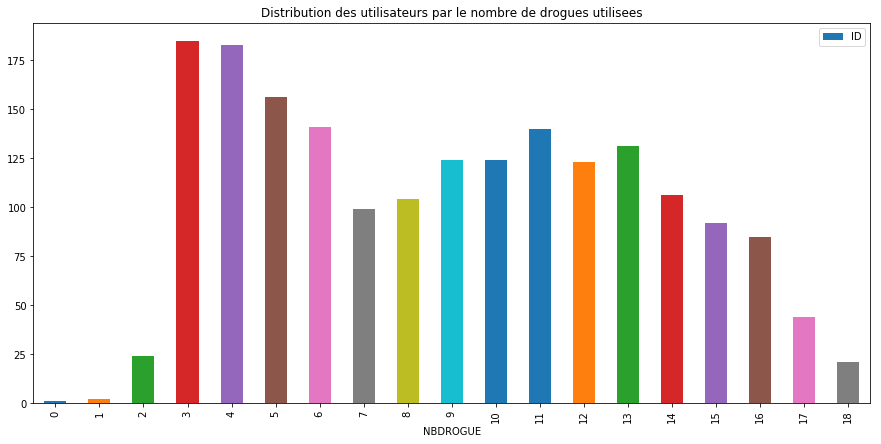

In [30]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Distribution des utilisateurs par le nombre de drogues utilisees'
data.groupby(['NBDROGUE']).count()['ID'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

### Classement des drogues les plus utilisées hier

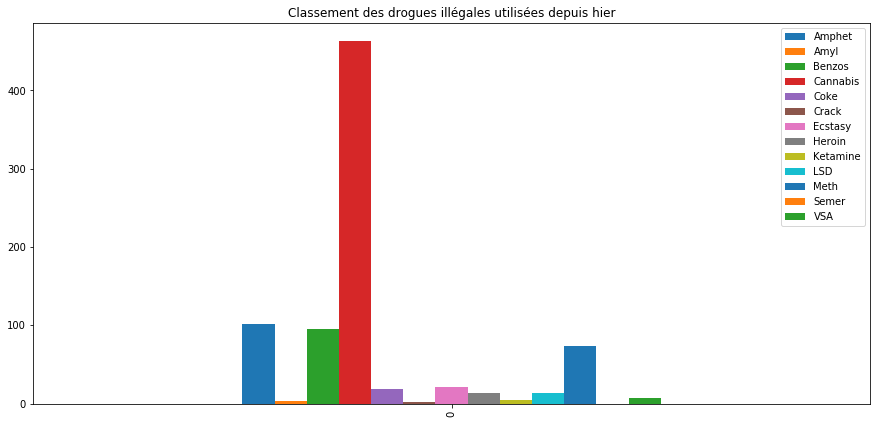

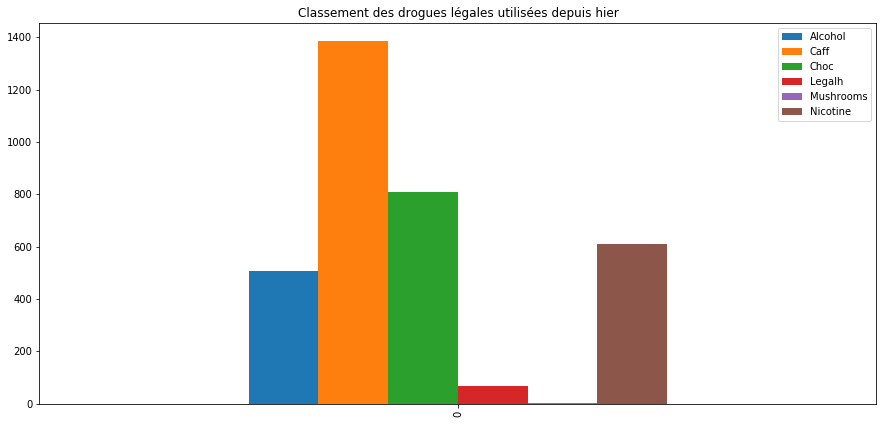

In [31]:
size = len(data)
consoAlco = 0
consoAmphet = 0
consoAmyl = 0
consoBenzos = 0
consoCaff = 0
consoCann = 0
consoChoc = 0
consoCoke = 0
consoCrack = 0
consoEcsta = 0
consoHero = 0
consoKeta = 0
consoLegal = 0
consoLSD = 0
consoMeth = 0
consoMush = 0
consoNico = 0
consoSemer = 0
consoVSA = 0

for i in range (0, size):  
    if (data.Alcohol[i] == 'Used in Last Day'): 
        consoAlco = consoAlco + 1 
    if (data.Amphet[i] == 'Used in Last Day'): 
        consoAmphet = consoAmphet + 1 
    if (data.Amyl[i] == 'Used in Last Day'): 
        consoAmyl = consoAmyl + 1 
    if (data.Benzos[i] == 'Used in Last Day'): 
        consoBenzos = consoBenzos + 1 
    if (data.Caff[i] == 'Used in Last Day'): 
        consoCaff = consoCaff + 1 
    if (data.Cannabis[i] == 'Used in Last Day'): 
        consoCann = consoCann + 1 
    if (data.Choc[i]== 'Used in Last Day'): 
        consoChoc = consoChoc + 1
    if (data.Coke[i] == 'Used in Last Day'): 
        consoCoke = consoCoke + 1
    if (data.Crack[i] == 'Used in Last Day'):
        consoCrack = consoCrack + 1
    if (data.Ecstasy[i] == 'Used in Last Day'): 
        consoEcsta = consoEcsta + 1
    if (data.Heroin[i] == 'Used in Last Day'): 
        consoHero = consoHero + 1
    if (data.Ketamine[i] == 'Used in Last Day'): 
        consoKeta = consoKeta + 1
    if (data.Legalh[i] == 'Used in Last Day'): 
        consoLegal = consoLegal + 1
    if (data.LSD[i] == 'Used in Last Day'): 
        consoLSD = consoLSD + 1
    if (data.Meth[i] == 'Used in Last Day'): 
        consoMeth = consoMeth + 1
    if (data.Mushrooms[i] == 'Used in Last Day'): 
        consoMush = consoMush + 1
    if (data.Nicotine[i] == 'Used in Last Day'): 
        consoNico = consoNico + 1
    if (data.Semer[i] == 'Used in Last Day'): 
        consoSemer = consoSemer + 1
    if (data.VSA[i] == 'Used in Last Day'): 
        consoVSA = consoVSA + 1

datasetIllegal = { 'Amphet': [consoAmphet], 
        'Amyl' : [consoAmyl], 
        'Benzos' : [consoBenzos], 
        'Cannabis' : [consoCann], 
        'Coke' : [consoCoke],
        'Crack' : [consoCrack], 
        'Ecstasy' : [consoEcsta], 
        'Heroin' : [consoHero], 
        'Ketamine' : [consoKeta], 
        'LSD' : [consoLSD],
        'Meth' : [consoMeth], 
        'Semer' : [consoSemer], 
        'VSA' : [consoVSA] }
    
datasetLegal = {'Alcohol' : [consoAlco],
        'Caff' : [consoCaff],  
        'Choc' : [consoChoc], 
        'Legalh' : [consoLegal], 
        'Mushrooms' : [consoMush], 
        'Nicotine' : [consoNico] }
    
    
dfi = pd.DataFrame.from_records(data = datasetIllegal)
dfl = pd.DataFrame.from_records(data = datasetLegal)

# plot data
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
title= 'Classement des drogues illégales utilisées depuis hier'
dfi.plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()


# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
title= 'Classement des drogues légales utilisées depuis hier'
dfl.plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

### Distribution des drogués de cocaïne et de LSD en fonction de l'age

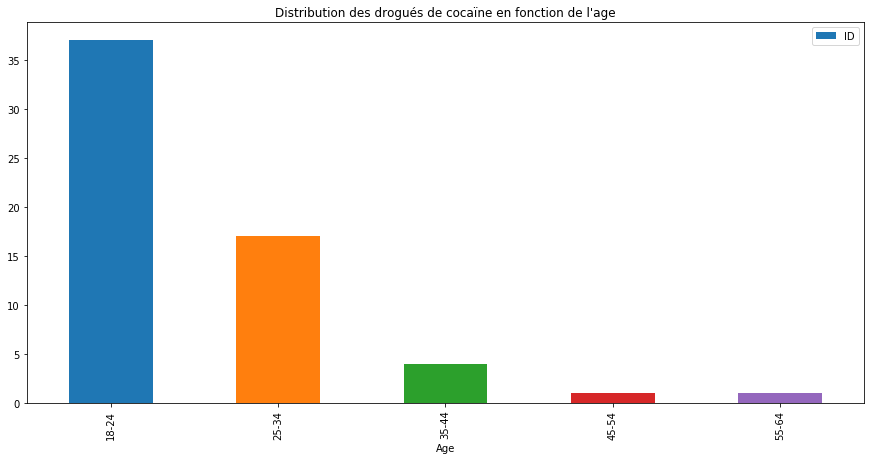

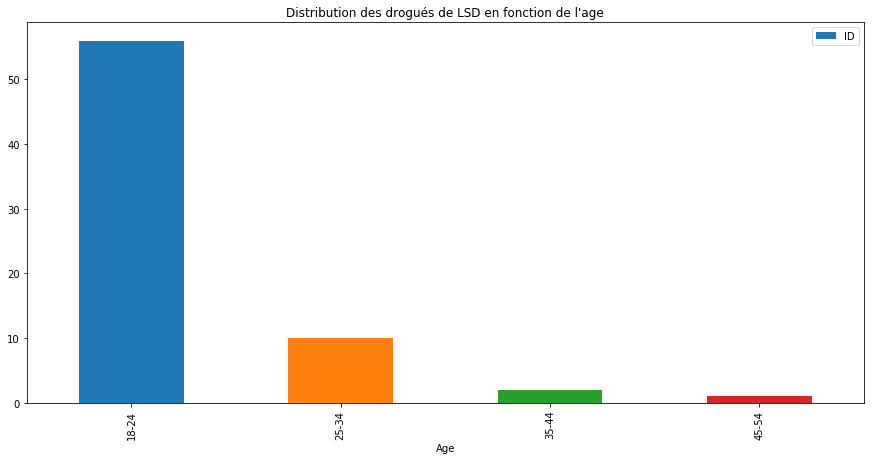

In [32]:
dataCocaine =  ((data.Coke == 'Used in Last Day') | (data.Coke == 'Used in Last Week') | (data.Coke == 'Used in Last Month'))
dataLSD =  ((data.LSD == 'Used in Last Day') | (data.LSD == 'Used in Last Week') | (data.LSD == 'Used in Last Month'))

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
title= 'Distribution des drogués de cocaïne en fonction de l\'age'
data[dataCocaine].groupby(['Age']).count()['ID'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
title= 'Distribution des drogués de LSD en fonction de l\'age'
data[dataLSD].groupby(['Age']).count()['ID'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

### Distribution des drogués de cocaïne et de LSD en fonction de son pays d'origine

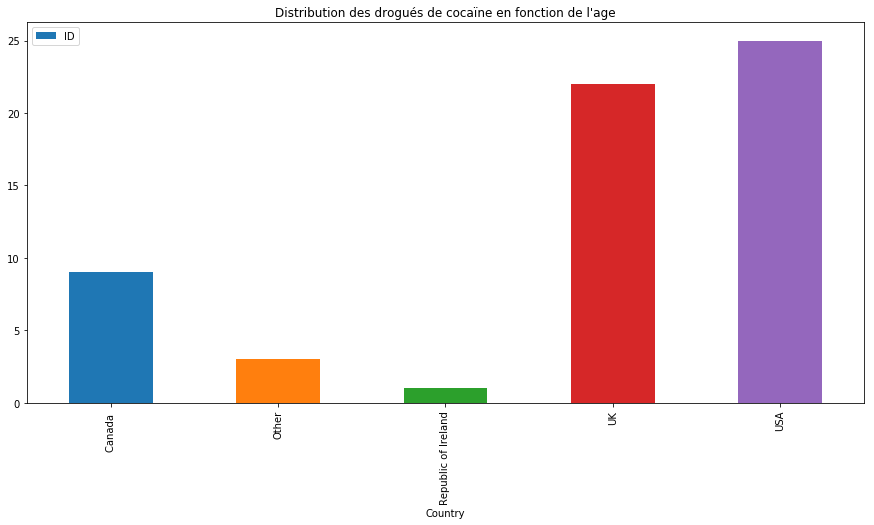

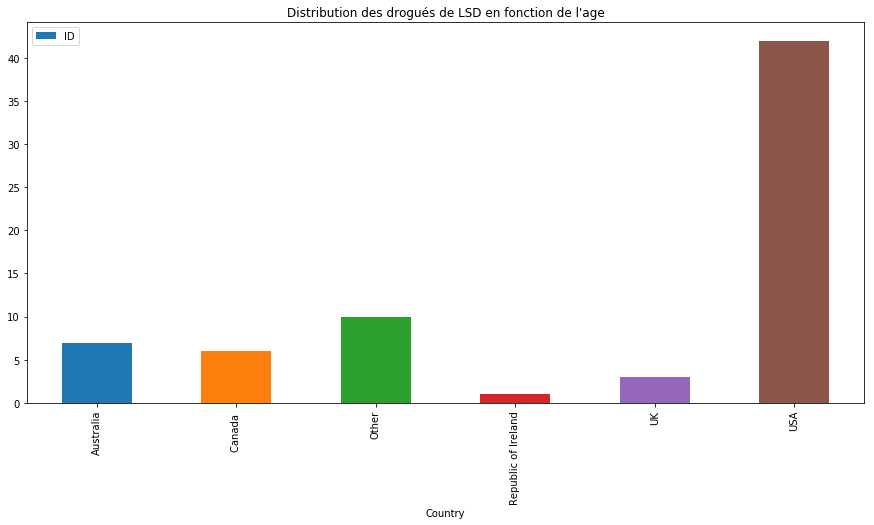

In [33]:
dataCocaine =  ((data.Coke == 'Used in Last Day') | (data.Coke == 'Used in Last Week') | (data.Coke == 'Used in Last Month'))
dataLSD =  ((data.LSD == 'Used in Last Day') | (data.LSD == 'Used in Last Week') | (data.LSD == 'Used in Last Month'))

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
title= 'Distribution des drogués de cocaïne en fonction de l\'age'
data[dataCocaine].groupby(['Country']).count()['ID'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
title= 'Distribution des drogués de LSD en fonction de l\'age'
data[dataLSD].groupby(['Country']).count()['ID'].plot(kind = 'bar', ax=ax, legend = True, title = title)
plt.show()

# Modélisation

## Data preparation
Pour modéliser mes données, je ne dois pas avoir de valeurs de type string dans mon dataset. Pour cela, j'utilise les données initiales et j'applique un dictionnaire sur les strings restants. 

In [57]:
head = ['ID', 
        'Age', 
        'Gender', 
        'Education', 
        'Country', 
        'Ethnicity', 
        'Nscore', 
        'Escore', 
        'Oscore', 
        'Ascore', 
        'Cscore', 
        'Impulsive', 
        'SS', 
        'Alcohol', 
        'Amphet', 
        'Amyl', 
        'Benzos', 
        'Caff', 
        'Cannabis', 
        'Choc',
        'Coke',
        'Crack', 
        'Ecstasy', 
        'Heroin', 
        'Ketamine', 
        'Legalh', 
        'LSD',
        'Meth', 
        'Mushrooms', 
        'Nicotine', 
        'Semer', 
        'VSA']

In [58]:
data = pd.read_csv("donnees.csv", sep =",", encoding="utf-8", names = head)
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [59]:
dicoDrug = {
    "CL0" : 0,
    "CL1" : 1,
    "CL2" : 2,
    "CL3" : 3,
    "CL4" : 4,
    "CL5" : 5,
    "CL6" : 6,
}

data.Alcohol = data.Alcohol.map(dicoDrug)
data.Amphet = data.Amphet.map(dicoDrug)
data.Amyl = data.Amyl.map(dicoDrug)
data.Benzos = data.Benzos.map(dicoDrug)
data.Caff = data.Caff.map(dicoDrug)
data.Cannabis = data.Cannabis.map(dicoDrug)
data.Choc = data.Choc.map(dicoDrug)
data.Coke = data.Coke.map(dicoDrug)
data.Crack = data.Crack.map(dicoDrug)
data.Ecstasy = data.Ecstasy.map(dicoDrug)
data.Heroin = data.Heroin.map(dicoDrug)
data.Ketamine = data.Ketamine.map(dicoDrug)
data.Legalh = data.Legalh.map(dicoDrug)
data.LSD = data.LSD.map(dicoDrug)
data.Meth = data.Meth.map(dicoDrug)
data.Mushrooms = data.Mushrooms.map(dicoDrug)
data.Nicotine = data.Nicotine.map(dicoDrug)
data.Semer = data.Semer.map(dicoDrug)
data.VSA = data.VSA.map(dicoDrug)

data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


## Determination des Hyperparametres

Le but de mon travail est d'obtenir un tableau visualisant les performances de 3 modèles différents. J'ai décidé de prédire le risque de consommer une drogue, et ce, pour toutes les drogues. 

Pour cela, j'ai d'abord essayer de trouver les hyperparamètres adéquats e, travaillant sur une seule drogue afin de les appliquer sur toutes les autres colonnes. 

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [61]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) 

### Support Vector Machine (SVM)

In [63]:
svc = svm.SVC(kernel='rbf', gamma=0.7)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7826855123674912


### K-Nearest Neighbors (KNN)
Comparaison du meilleur K

In [64]:
error = []
k_min = 1
k_max = 20

# Calculating error for K values between 1 and 20
for i in range(k_min, k_max):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur K :  14 , précision :  0.783


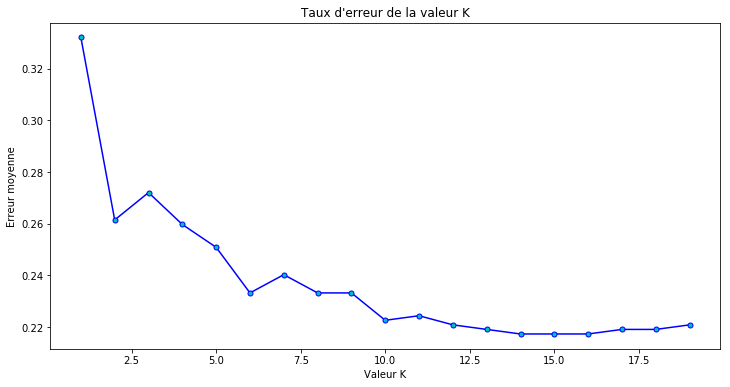

In [66]:
plt.figure(figsize=(12, 6))  
plt.plot(range(k_min, k_max), error, color='blue', linestyle='-', marker='.',  
         markerfacecolor='c', markersize=10)
plt.title('Taux d\'erreur de la valeur K')  
plt.xlabel('Valeur K')  
plt.ylabel('Erreur moyenne')  

best_k = np.argmin(error) + 1
print("Meilleur K : ", best_k, ", précision : ", 1 - round(min(error), 3))

### Random Forest
Comparaison du meilleur N

In [50]:
error = []
n_min = 1
n_max = 100

for i in range(n_min, n_max):  
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Meilleur N :  63 , précision :  0.793


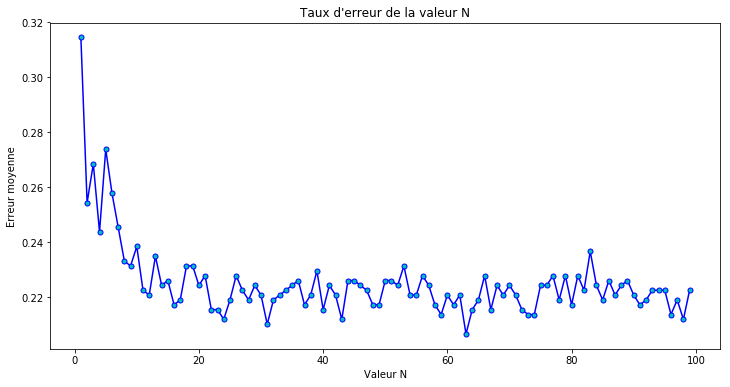

In [51]:
plt.figure(figsize=(12, 6))  
plt.plot(range(n_min, n_max), error, color='blue', linestyle='-', marker='.',  
         markerfacecolor='c', markersize=10)
plt.title('Taux d\'erreur de la valeur N')  
plt.xlabel('Valeur N')  
plt.ylabel('Erreur moyenne')  

best_n = np.argmin(error) + 1
print("Meilleur N : ", best_n, ", précision : ", 1 - round(min(error), 3))

## Automatisation

Je pars du principe que si ça fonctionne pour une colonne, alors ça fonctionnera pour les autres.
J'utilise les hyperparamètres trouvés ci-dessus dans l'automatisation.

In [52]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [53]:
def modelisationDataset(): 
    headers = list(data.columns.values)
    
    modelisation = pd.DataFrame(columns = ['Drug', 'SVC', 'KNN', 'Random forrest'])
    
    for i in range (13, len(data.columns)):
        #Séparation du dataset 
        X = data.loc[:, data.columns != data.columns[i]].values
        Y = data.loc[:, data.columns[i]].values
        
        #Création des dataset de Training et d'Apprentissage
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) 
        
        #Nom de la drogue utilisée
        drogue = headers[i]
        
        accuracy_score_svc = 0.0; 
        accuracy_score_knn = 0.0; 
        accuracy_score_rf = 0.0; 
        
        #Prédiction et Scoring du modèle SVC
        svc = svm.SVC(kernel='rbf', gamma=0.7)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        accuracy_score_svc = accuracy_score(y_test, y_pred)
        
        #Prédiction et Scoring du modèle KNN
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_score_knn = accuracy_score(y_test, y_pred )

        #Prédiction et Scoring du modèle Random Forrest
        rf = RandomForestClassifier(n_estimators=best_n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy_score_rf = accuracy_score(y_test, y_pred)
        
        #Ajout de la nouvelle ligne dans le tableau final
        row = {'Drug' : drogue , 'SVC' : accuracy_score_svc, 'KNN':accuracy_score_knn, 'Random forrest':accuracy_score_rf}
        modelisation = modelisation.append(row, ignore_index=True)
        
    return modelisation

In [54]:
resultat = modelisationDataset()

## Visualisation des performances

Avec ce tableau, je peux me rendre compte quel modèle est le plus apte à prédire la consommation de la drogue en question. 

In [55]:
resultat

,Drug,SVC,KNN,Random forrest
0,Alcohol,0.415194,0.342756,0.385159
1,Amphet,0.500000,0.498233,0.614841
2,Amyl,0.687279,0.685512,0.749117
3,Benzos,0.540636,0.510601,0.588339
4,Caff,0.724382,0.720848,0.724382
5,Cannabis,0.257951,0.337456,0.478799
6,Choc,0.431095,0.374558,0.408127
7,Coke,0.584806,0.551237,0.673145
8,Crack,0.862191,0.862191,0.871025
9,Ecstasy,0.521201,0.528269,0.632509
